<a href="https://colab.research.google.com/github/fmarotta/PBoC_2023/blob/main/Gillespie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Gillespie Algorithm

We are going to simulate the binding of  ligands to receptors.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [61]:
k_off = 1 # s^-1
k_on = 1 # s^-1 M^-1
ligand_concentration = 1 # M

n_steps = 500
waiting_times = np.zeros(n_steps + 1)

receptor_state = np.zeros(n_steps + 1)

# initial condition
receptor_state[0] = False # unbound

In [62]:
for i in range(n_steps):
  p = np.random.rand()
  if receptor_state[i] == False:
    t = -np.log(p) / (k_on * ligand_concentration)
  else:
    t = -np.log(p) / k_off
  waiting_times[i] = t
  receptor_state[i+1] = not receptor_state[i]

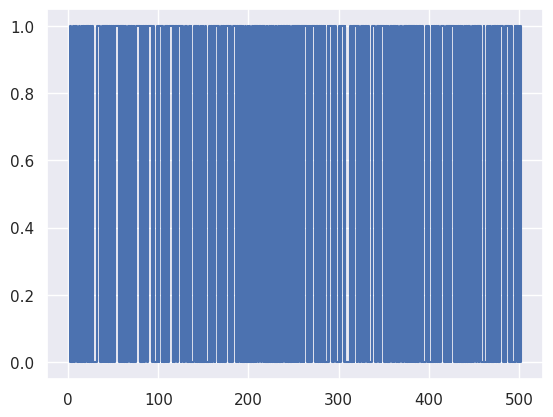

In [63]:
fig, ax = plt.subplots(1)
ax.step(np.cumsum(waiting_times), receptor_state)


In [67]:
# What fraction of time is spent in the "bound" state?
time_bound = np.sum(waiting_times * receptor_state)
time_total = np.sum(waiting_times)
Kd = time_bound / (time_total - time_bound)
Kd_theory = k_off / k_on
print(Kd)
print(Kd_theory)

1.132688847740115
1.0


In [65]:
# How does it change with ligand concentration?
def gillespie(ligand_concentration):
  waiting_times = np.zeros(n_steps + 1)
  receptor_state = np.zeros(n_steps + 1)
  # initial condition
  receptor_state[0] = False # unbound
  for i in range(n_steps):
    p = np.random.rand()
    if receptor_state[i] == False:
      t = -np.log(p) / (k_on * ligand_concentration)
    else:
      t = -np.log(p) / k_off
    waiting_times[i] = t
    receptor_state[i+1] = not receptor_state[i]
  # compute p_bound
  time_bound = np.sum(waiting_times * receptor_state)
  time_total = np.sum(waiting_times)
  p_bound = time_bound / time_total
  return p_bound


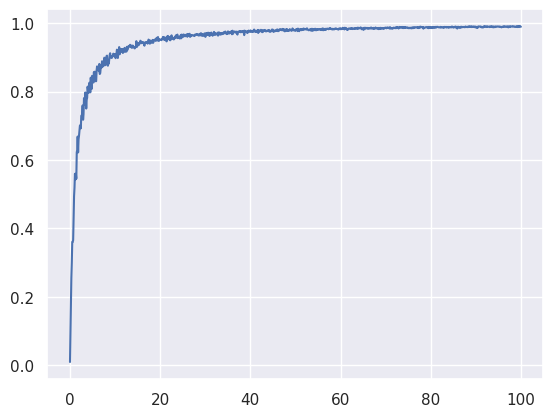

In [66]:
ligand_concentrations = np.linspace(0.01, 100, 1000)
p_bounds = [gillespie(i) for i in ligand_concentrations]

fig, ax = plt.subplots(1)
ax.plot(ligand_concentrations, p_bounds)